In [20]:
# 中文字体修复与验证工具（防重复打补丁，解决递归）
from matplotlib import font_manager as _fm, rcParams as _rc
import matplotlib as _mpl

try:
    import seaborn as _sns
except Exception:
    _sns = None

# 尝试注册常见中文字体路径（如果存在）
_common_paths = [
    '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc',
    '/usr/share/fonts/truetype/noto/NotoSansCJK-Regular.ttc',
    '/usr/share/fonts/opentype/noto/NotoSansCJKSC-Regular.otf',
    '/usr/share/fonts/opentype/noto/NotoSansSC-Regular.otf',
    '/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc',
]
for _p in _common_paths:
    try:
        import os
        if os.path.exists(_p):
            _fm.fontManager.addfont(_p)
    except Exception:
        pass

# 在已安装字体中选择一个常见的 CJK 家族名
_candidates = [
    'Noto Sans CJK SC','Source Han Sans SC','WenQuanYi Zen Hei',
    'Microsoft YaHei','SimHei','Sarasa Gothic SC',
    'Noto Sans CJK','Source Han Sans','Noto Sans CJK JP','Noto Sans CJK TC'
]
_available = {f.name for f in _fm.fontManager.ttflist}
_choice = None
for _name in _candidates:
    if _name in _available:
        _choice = _name
        break

# 全局 rcParams 设置（含权重为 normal，避免粗体触发回退）
_rc['font.family'] = 'sans-serif'
if _choice:
    _rc['font.sans-serif'] = [_choice]
_rc['axes.unicode_minus'] = False
_rc['font.weight'] = 'normal'
_rc['axes.titleweight'] = 'normal'
_rc['axes.labelweight'] = 'normal'

# 同步 seaborn 主题字体
if _sns is not None:
    try:
        _sns.set_theme(font=_choice or 'sans-serif')
    except Exception:
        pass

# 防重复：只在未打过补丁时替换 style.use；并始终保留原函数在 _mpl._style_use_original
if not hasattr(_mpl, '_style_use_original'):
    _mpl._style_use_original = _mpl.style.use

# 仅当当前 use 不是我们打过标记的包装器时，才进行包装
if not getattr(_mpl.style.use, '__cn_keep_patch__', False):
    def __use_and_keep_fonts(style_name):
        # 始终调用首次保存的原始函数，避免再次嵌套包装导致递归
        _mpl._style_use_original(style_name)
        # 重新应用关键 rc 设置和 seaborn 主题
        _rc['font.family'] = 'sans-serif'
        if _choice:
            _rc['font.sans-serif'] = [_choice]
        _rc['axes.unicode_minus'] = False
        _rc['font.weight'] = 'normal'
        _rc['axes.titleweight'] = 'normal'
        _rc['axes.labelweight'] = 'normal'
        if _sns is not None:
            try:
                _sns.set_theme(font=_choice or 'sans-serif')
            except Exception:
                pass
    __use_and_keep_fonts.__cn_keep_patch__ = True
    _mpl.style.use = __use_and_keep_fonts
else:
    # 若已打过补丁，则此处只需重新应用 rc 设置一次
    _rc['font.family'] = 'sans-serif'
    if _choice:
        _rc['font.sans-serif'] = [_choice]
    _rc['axes.unicode_minus'] = False
    _rc['font.weight'] = 'normal'
    _rc['axes.titleweight'] = 'normal'
    _rc['axes.labelweight'] = 'normal'
    if _sns is not None:
        try:
            _sns.set_theme(font=_choice or 'sans-serif')
        except Exception:
            pass

print("中文字体检测：", "找到 -> " + _choice if _choice else "未找到可用中文字体（将使用默认字体）")
print("提示：如果之前报 RecursionError，请重新运行本单元后再运行绘图单元；本补丁已防重复包装 style.use。")

中文字体检测： 找到 -> WenQuanYi Zen Hei
提示：如果之前报 RecursionError，请重新运行本单元后再运行绘图单元；本补丁已防重复包装 style.use。


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
sns.set_style("whitegrid")  # 设置图表风格

%matplotlib inline


In [8]:
df = sns.load_dataset('titanic')
# df = pd.read_csv('tested.csv')
print("数据集形状:", df.shape)
print("\n前5行数据:")
df.head()

数据集形状: (891, 15)

前5行数据:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
print("列信息:")
df.info()

print("\n数值列的描述性统计:")
df.describe()

列信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

数值列的描述性统计:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# 检查缺失值
print("缺失值统计:")
df.isnull().sum().sort_values(ascending=False)

缺失值统计:


deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [17]:
# 创建数据清洗函数（优化版）
def clean_titanic_data(df):
    # 复制数据，避免修改原始数据
    data = df.copy()
    
    # 处理缺失值 - 使用更安全的方式
    # 年龄用中位数填充
    age_median = data['age'].median()
    data['age'] = data['age'].fillna(age_median)
    
    # 登船港口用众数填充
    embarked_mode = data['embarked'].mode()[0]
    data['embarked'] = data['embarked'].fillna(embarked_mode)
    data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])
    
    # 删除缺失太多的列（如船舱号）
    data = data.drop('deck', axis=1)
    
    # 创建新特征：家庭大小
    data['family_size'] = data['sibsp'] + data['parch'] + 1
    
    # 创建新特征：是否独自旅行
    data['is_alone'] = (data['family_size'] == 1).astype(int)
    
    return data

# 应用清洗函数
df_clean = clean_titanic_data(df)
print("数据清洗完成！")

# 检查清洗后的缺失值情况
print("\n清洗后各列缺失值统计:")
missing_after = df_clean.isnull().sum()
print(missing_after[missing_after > 0])  # 只显示还有缺失值的列

print(f"\n总缺失值数量: {df_clean.isnull().sum().sum()}")

数据清洗完成！

清洗后各列缺失值统计:
Series([], dtype: int64)

总缺失值数量: 0


In [18]:
# 查看清洗后的数据基本信息
print("清洗后数据形状:", df_clean.shape)
print("\n数据前5行:")
df_clean.head()

清洗后数据形状: (891, 16)

数据前5行:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size,is_alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,2,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,2,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,1,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,2,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,1


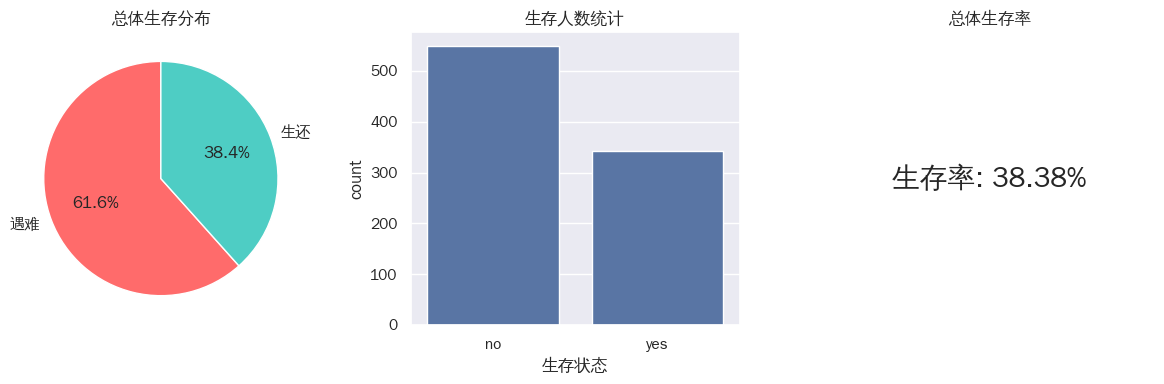

数据集总人数: 891
生还人数: 342
遇难人数: 549
总体生存率: 38.38%


In [22]:
# 总体生存情况（修复版）
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
survival_count = df_clean['survived'].value_counts()
plt.pie(survival_count.values, labels=['遇难', '生还'], autopct='%1.1f%%', 
        colors=['#ff6b6b', '#4ecdc4'], startangle=90)
plt.title('总体生存分布')

plt.subplot(1, 3, 2)
# 修复：移除palette参数，因为这里没有hue
sns.countplot(data=df_clean, x='alive')
plt.title('生存人数统计')
plt.xlabel('生存状态')

plt.subplot(1, 3, 3)
# 生存率数值显示
survival_rate = df_clean['survived'].mean()
plt.text(0.5, 0.5, f'生存率: {survival_rate:.2%}', 
         ha='center', va='center', fontsize=20)
plt.axis('off')
plt.title('总体生存率')

plt.tight_layout()
plt.show()

print(f"数据集总人数: {len(df_clean)}")
print(f"生还人数: {survival_count[1]}")
print(f"遇难人数: {survival_count[0]}")
print(f"总体生存率: {survival_rate:.2%}")

/tmp/ipykernel_6631/3868106178.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x='sex', y='survived', estimator='mean',


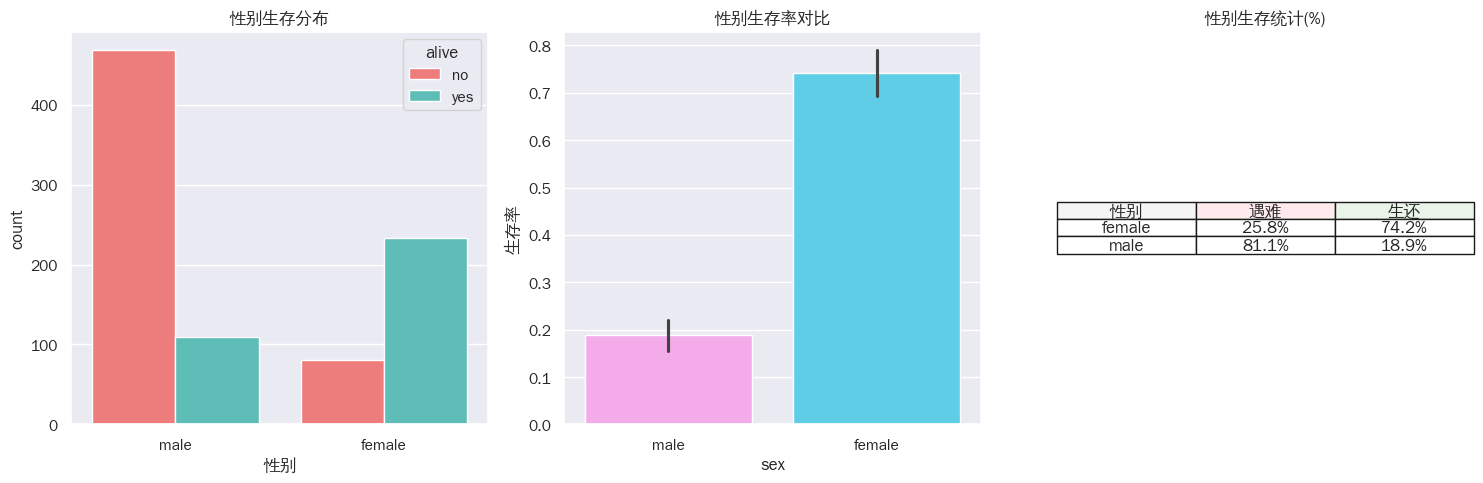


性别生存率详细分析:
        count   mean
sex                 
female    314  0.742
male      577  0.189


In [23]:
# 性别对生存率的影响（修复版）
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# 修复：正确的palette使用方式
sns.countplot(data=df_clean, x='sex', hue='alive', 
              palette={'no': '#ff6b6b', 'yes': '#4ecdc4'})
plt.title('性别生存分布')
plt.xlabel('性别')

plt.subplot(1, 3, 2)
# 计算性别生存率
gender_survival = df_clean.groupby('sex')['survived'].agg(['count', 'mean'])
sns.barplot(data=df_clean, x='sex', y='survived', estimator='mean',
            palette=['#ff9ff3', '#48dbfb'])  # 为不同性别设置不同颜色
plt.title('性别生存率对比')
plt.ylabel('生存率')

plt.subplot(1, 3, 3)
# 详细统计表格
gender_table = pd.crosstab(df_clean['sex'], df_clean['alive'], normalize='index') * 100
gender_table_display = gender_table.round(2)

# 创建更美观的表格显示
table_data = []
for gender in gender_table_display.index:
    row = [gender]
    for status in gender_table_display.columns:
        row.append(f"{gender_table_display.loc[gender, status]:.1f}%")
    table_data.append(row)

plt.table(cellText=table_data,
          rowLabels=None,
          colLabels=['性别', '遇难', '生还'],
          cellLoc='center', loc='center',
          colColours=['#f5f5f5', '#ffebee', '#e8f5e8'])
plt.axis('off')
plt.title('性别生存统计(%)')

plt.tight_layout()
plt.show()

print("\n性别生存率详细分析:")
print(gender_survival.round(3))

/tmp/ipykernel_6631/1123571558.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_survival = df_clean.groupby('class')['survived'].mean().sort_values(ascending=False)
/tmp/ipykernel_6631/1123571558.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_survival.index, y=class_survival.values,
/tmp/ipykernel_6631/1123571558.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='class', y='fare',


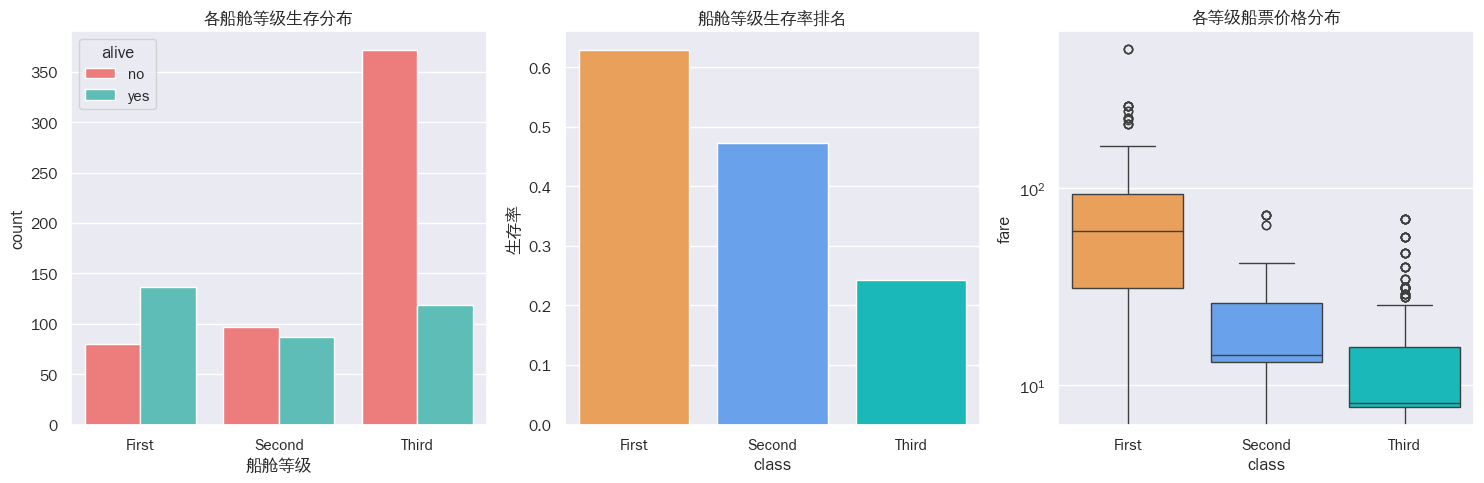

各船舱等级生存率:
First舱: 62.96% (共216人)
Second舱: 47.28% (共184人)
Third舱: 24.24% (共491人)


In [24]:
# 船舱等级对生存率的影响（修复版）
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=df_clean, x='class', hue='alive', 
              palette={'no': '#ff6b6b', 'yes': '#4ecdc4'},
              order=['First', 'Second', 'Third'])
plt.title('各船舱等级生存分布')
plt.xlabel('船舱等级')

plt.subplot(1, 3, 2)
class_survival = df_clean.groupby('class')['survived'].mean().sort_values(ascending=False)
sns.barplot(x=class_survival.index, y=class_survival.values, 
            order=class_survival.index,
            palette=['#ff9f43', '#54a0ff', '#00d2d3'])  # 为不同等级设置颜色
plt.title('船舱等级生存率排名')
plt.ylabel('生存率')

plt.subplot(1, 3, 3)
# 票价与船舱等级的关系
sns.boxplot(data=df_clean, x='class', y='fare', 
            order=['First', 'Second', 'Third'],
            palette=['#ff9f43', '#54a0ff', '#00d2d3'])
plt.title('各等级船票价格分布')
plt.yscale('log')  # 使用对数坐标更清晰

plt.tight_layout()
plt.show()

print("各船舱等级生存率:")
for cls, rate in class_survival.items():
    count = len(df_clean[df_clean['class'] == cls])
    print(f"{cls}舱: {rate:.2%} (共{count}人)")

<Figure size 1000x500 with 0 Axes>

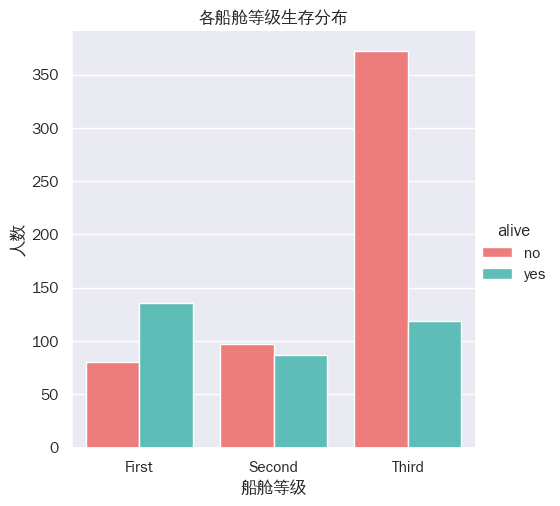

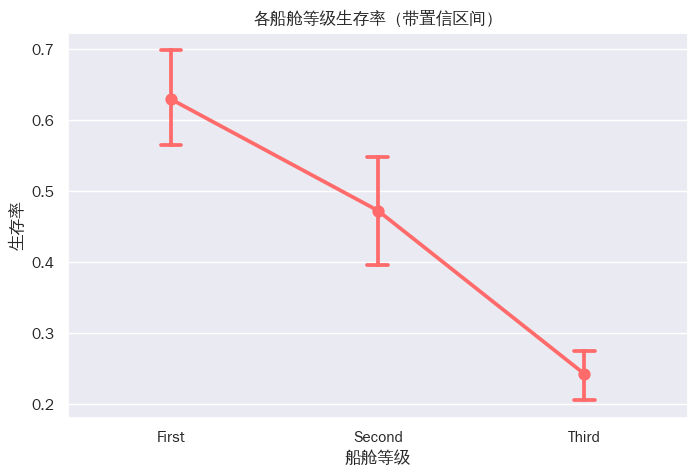

In [25]:
# 方法1：使用catplot（更现代的语法）
plt.figure(figsize=(10, 5))
g = sns.catplot(data=df_clean, x='class', hue='alive', kind='count',
                palette={'no': '#ff6b6b', 'yes': '#4ecdc4'},
                order=['First', 'Second', 'Third'])
g.set_axis_labels('船舱等级', '人数')
plt.title('各船舱等级生存分布')
plt.show()

# 方法2：使用pointplot显示生存率
plt.figure(figsize=(8, 5))
sns.pointplot(data=df_clean, x='class', y='survived', 
              order=['First', 'Second', 'Third'],
              capsize=0.1, color='#ff6b6b')
plt.title('各船舱等级生存率（带置信区间）')
plt.ylabel('生存率')
plt.xlabel('船舱等级')
plt.show()